# Inferential Stats Exploration

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing as pp
from sklearn import linear_model as lm
%pylab inline

#wrangled data imported into a pandas dataframe
df = pd.read_csv('~/Documents/Repository/Capstone-1_WorldBank_GenderData/finalvars.csv')

Populating the interactive namespace from numpy and matplotlib


In [15]:
df.tail()

,Unnamed: 0,country,life,bc,matdeath,teen,gdp,healthspend,eduspend
3940,3940,Zimbabwe,49.574659,NaN,446.0,115.0006,674.268695,1.684360,1.97333
3941,3941,Zimbabwe,51.600366,58.5,409.0,114.1658,768.556409,2.121150,NaN
3942,3942,Zimbabwe,53.643073,NaN,379.0,113.3310,850.827697,2.771620,NaN
3943,3943,Zimbabwe,55.633000,NaN,369.0,111.8664,905.500322,2.847450,NaN
3944,3944,Zimbabwe,57.498317,66.9,401.0,110.4018,931.198185,2.466495,NaN


In [17]:
df = df.drop('Unnamed: 0', 1)

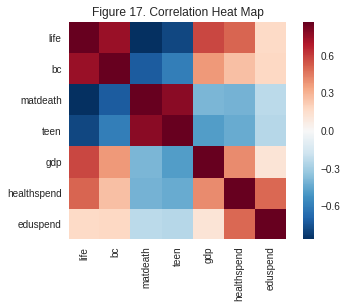

In [20]:
#visualized 'heatmap' of correlations between the variables in the focus df
corrmat= df.corr ()
sns.heatmap(corrmat, vmax=.8, square=True)
sns.plt.title('Figure 17. Correlation Heat Map')
savefig('heatmap.png')

In [4]:
#find which variable(s) has the most missing value 
#'abuse' was determined to not have enough date points to be useful
df.isnull().sum().sort_values()

Unnamed: 0        0
country           0
life            246
gdp             301
teen            345
healthspend     422
matdeath        510
eduspend       1845
bc             3306
dtype: int64

In [5]:
#To find which variables will result in the highest number of instances when paired with Contraceptive use, do a for loop comparing each variable, one at a time to BC, doing dropna and see what df has the most rows.
dv = ['life', 'matdeath', 'teen', 'gdp', 'healthspend', 'eduspend']
for var in dv:
    compare = pd.DataFrame()
    compare['bc'] = df['bc']
    compare[var]= df[var]
    compare = compare.dropna()
    print compare.count()

bc      629
life    629
dtype: int64
bc          624
matdeath    624
dtype: int64
bc      628
teen    628
dtype: int64
bc     623
gdp    623
dtype: int64
bc             622
healthspend    622
dtype: int64
bc          373
eduspend    373
dtype: int64


In [6]:
#change scale of data to range of 0 to 1
dropdf= df.copy().dropna()
dropdf = dropdf.drop('country', 1)
scaler = pp.MinMaxScaler()
scale = pd.DataFrame(scaler.fit_transform(dropdf), columns= dropdf.columns, index = dropdf.index)
#Set up IV matrix and DV array to test model accuracy
dv = ['bc', 'life', 'matdeath', 'teen']
for var in dv:
    print(var)
    y = pd.DataFrame()
    y = scale[var]
    X = scale.copy()
    del X[var]
    print(X.head())

sgdr = lm.SGDRegressor(n_iter=1000)  # or any sklearn regressor that you like
sgdr.fit(X,y)
sgdr.score(X, y)

bc
    Unnamed: 0      life  matdeath      teen       gdp  healthspend  eduspend
10    0.000000  0.467943  0.219494  0.450212  0.004822     0.214419  0.276804
11    0.000256  0.476183  0.201360  0.422924  0.005378     0.142159  0.241864
15    0.001278  0.820981  0.015111  0.079746  0.011247     0.158779  0.175740
17    0.001789  0.841356  0.012845  0.079571  0.014194     0.158584  0.156729
20    0.002556  0.862745  0.010200  0.077814  0.027509     0.200539  0.171761
life
    Unnamed: 0        bc  matdeath      teen       gdp  healthspend  eduspend
10    0.000000  0.190840  0.219494  0.450212  0.004822     0.214419  0.276804
11    0.000256  0.184297  0.201360  0.422924  0.005378     0.142159  0.241864
15    0.001278  0.580153  0.015111  0.079746  0.011247     0.158779  0.175740
17    0.001789  0.772083  0.012845  0.079571  0.014194     0.158584  0.156729
20    0.002556  0.608506  0.010200  0.077814  0.027509     0.200539  0.171761
matdeath
    Unnamed: 0      life        bc      teen   

0.61366694862849358

In [7]:
sgdr.coef_

array([-0.02542528, -0.29852207, -0.09369672,  0.51161121, -0.17529059,
        0.08052312, -0.1331853 ])

In [8]:
X.shape

(368, 7)

In [9]:
#Create small data frame with only Contraceptive Use ('bc') and Life Expectancy ('life'), drop Nan values and run an SGD Regressor model on the two variables
bclife = pd.DataFrame()
bclife['bc'] = df['bc']
bclife['life'] = df['life']
bclife = bclife.dropna()
blmodel = lm.SGDRegressor(n_iter=100000, eta0=.001)
blmodel.fit(bclife[['bc']], bclife.life)
blmodel.score(bclife[['bc']], bclife.life)

0.550942847446244

### There is a correlation coefficient of 0.55 between Contraceptive Use and Life Expectancy.